In [2]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
pd.set_option("display.max_columns",999)
rcParams['figure.figsize'] = 15, 6

In [18]:
data = pd.read_csv('AirPassengers.csv', parse_dates=['Month'], index_col='Month').rename(columns = {'#Passengers': 'Passengers'})
print (data.head())
print ('\n Data Types:')
print (data.dtypes)

            Passengers
Month                 
1949-01-01         112
1949-02-01         118
1949-03-01         132
1949-04-01         129
1949-05-01         121

 Data Types:
Passengers    int64
dtype: object


In [20]:
ts = pd.Series(data['Passengers'])
ts.head()

Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
Name: Passengers, dtype: int64

In [28]:
ts['1949-01': '1949-05']

Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
Name: Passengers, dtype: int64

### Check Stationarity of a Time Series
A TS is said to be stationary if its statistical properties such as mean, variance remain constant over time. Most of the TS models work on the assumption that the TS is stationary. Intuitively, we can sat that if a TS has a particular behaviour over time, there is a very high probability that it will follow the same in the future. Also, the theories related to stationary series are more mature and easier to implement as compared to non-stationary series.

Stationarity is defined using very strict criterion. However, for practical purposes we can assume the series to be stationary if it has constant statistical properties over time, ie. the following:

1. constant mean
1. constant variance
1. an autocovariance that does not depend on time.

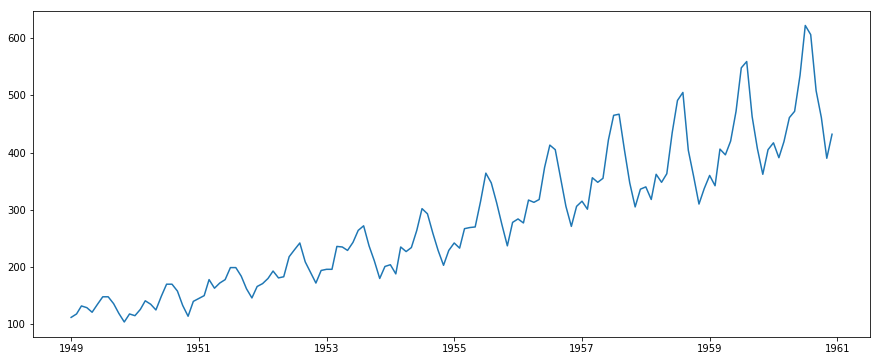

In [30]:
plt.plot(ts);

It is evident that there is an overall increasing trend in the data along with some seasonal variations. However, it might not always be possible to make such visual inferences. So, we can check stationarity using the following:

1. **Plotting Rolling Statistics**: We can plot the moving average or moving variance and see if it varies with time. By moving average/variance I mean that at any instant ‘t’, we’ll take the average/variance of the last year, i.e. last 12 months. But again this is more of a visual technique.
1. **Dickey-Fuller Test**: This is one of the statistical tests for checking stationarity. Here the null hypothesis is that the TS is non-stationary. The test results comprise of a Test Statistic and some Critical Values for difference confidence levels. If the ‘Test Statistic’ is less than the ‘Critical Value’, we can reject the null hypothesis and say that the series is stationary. 

In [31]:
# defined a function which takes a TS as input and generate
# rolling statistics plots along with Dickey-Fuller test results 

from statsmodels.tsa.stattools import adfuller
from pandas.core import datetools

def test_stationarity(timeseries):
    # Calculate rolling statistics 
    rolmean = pd.rolling_mean(timeseries, window = 12)
    rolstd = pd.rolling_std(timeseries, windows = 12)
    
    # Plot rolling statistics:
    orig = plt.plot(timeseries, color = 'blue' , label = 'Original')
    mean = plt.plot(rolmean, color = 'red', label = 'Rolling Mean')
    std = plt.plot(rolstd, color = 'black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block = False)

C:\Users\User\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [14]:
sales_data = pd.read_excel("salesdata.xlsx", index_col='SKU #').transpose()

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
  """Entry point for launching an IPython kernel.
C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).std()
  


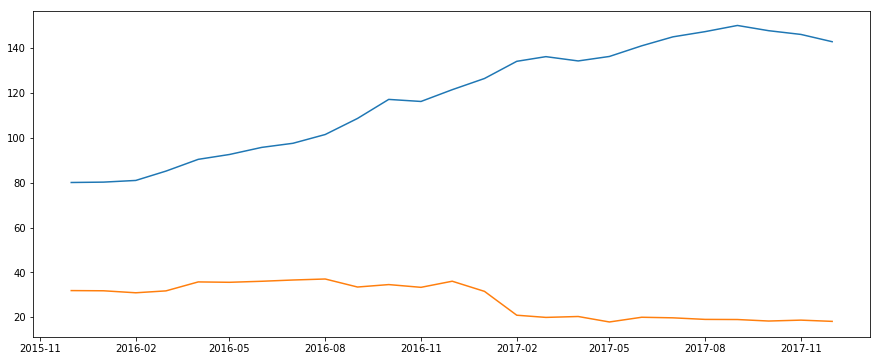

In [23]:
rolling_mean= pd.rolling_mean(sales_data[2010], window=12)
rolling_std = pd.rolling_std(sales_data[2010], window=12)
plt.plot(rolling_mean)
plt.plot(rolling_std)

x = np.linspace(0, 2 * np.pi, 400)
plt.plot(x,  'r+')
plt.plot('xlabel', 'ylabel')

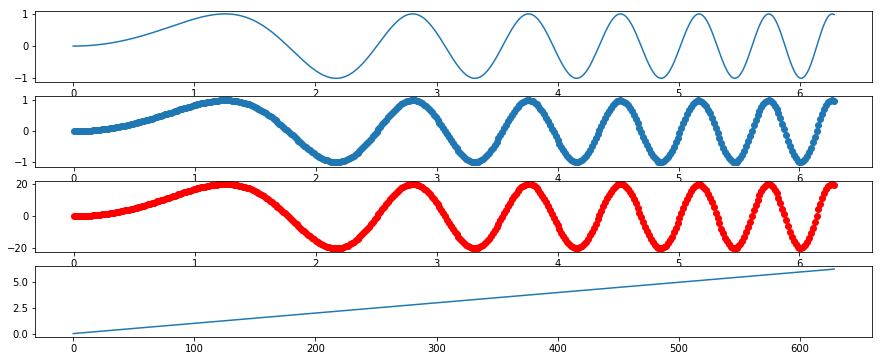

In [72]:
f, axarr = plt.subplots(4, sharex=False, sharey=False)
axarr[0].plot(x, y)
axarr[1].scatter(x, y)
axarr[2].scatter(x, 20 * y, color='r')
axarr[3].plot(x*100,x)

In [55]:
x = np.linspace(0, 2 * np.pi, 400)
y = np.sin(x ** 2)

axarr[0].plot(x, y)
axarr[1].scatter(x, y)
axarr[2].scatter(x, 2 * y ** 2 - 1, color='r')
plt.show()

TypeError: 'AxesSubplot' object is not iterable

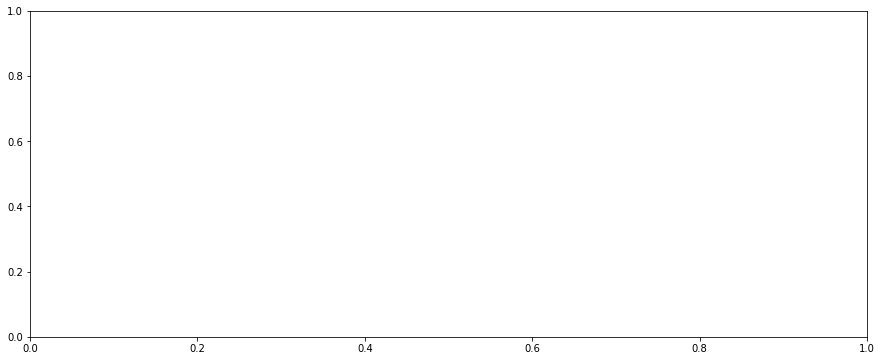

In [73]:
g, axarr = plt.subplot()
axarr.plot(x*100,x)